<a href="https://colab.research.google.com/github/ufrpe-ensino/curso-mineracao-textos/blob/respostas/01_PLN_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy

spaCy é uma biblioteca para PLN que se tornado bastante popular nos últimos anos. Ela é mais recente que o NLTK, projetada especificamente para i) trabalhar em problemas maiores e ii) ocultar detalhes irrelevantes para o  usuário. Vamos nos concentrar nos principais recursos:

[Carregando modelos pré-treinados](#loading)<br>

[Tokenization](#tokenization)<br>

[Lemmatization](#lemma)<br>

[Named entity recognition (NER)](#ner)<br>

[Vizualizando NER](#visualize-ner)<br>

[Word vectors e Similaridades](#vectors)<br>


# Instalação

In [2]:
!pip install spacy
!spacy download pt

     |████████████████████████████████| 21.2MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186282 sha256=1212c405f57b932d8e743a2fc4c2b88089aaa1c76c2b5e9496682fcd30b91eff
  Stored in directory: /tmp/pip-ephem-wheel-cache-hcoudto3/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [1]:
import os
import spacy
import numpy as np
import pandas as pd

## Loading spaCy models <a id='loading'></a>

O spaCy disponibiliza uma série de [modelos](https://spacy.io/usage/models) pré-treinados, que devem ser baixados e podem funcionar em problemas mais genéricos. spaCy possui modelos diferentes para diferentes idiomas, inclusive em português. 

Para fazer uso dos modelos, primeiro os carregamos no spaCy com 

`nlp = spacy.load ('en')`, que armazena o modelo em uma variável chamada nlp para nós. O `'en'` significa inglês. Se você deseja processar dados nesses idiomas, primeiro precisa baixar os modelos relevantes e carregá-los de maneira semelhante.

O modelo aqui referenciado para o português `pt` corresponde a um modelo de CNN treinado em um subconjunto da base WikiNER. Além do `pt_core_news_sm`, o spacy possui o `pt_core_news_md` e o `pt_core_news_lg`. Detalhes das bases utilizadas e acurácia de cada modelo podem ser vistos [aqui](https://spacy.io/models/pt). 

In [3]:
nlp = spacy.load('pt')

O modelo agora pode ser acessado através da variável `nlp`:

In [4]:
doc = nlp("Eu gostaria que as aboboras viessem com mais sementes.")

## Tokenization <a id='tokenization'></a>

A tokenização no spaCy é bem simples de ser utilizada com os modelos pré-treinados. Quando iteramos sobre um objeto `Doc`, spaCy assume que queremos iterar sobre os tokens.

In [5]:
for token in doc:
    print(token)

Eu
gostaria
que
as
aboboras
viessem
com
mais
sementes
.


In [6]:
# quantidade de tokens
len(doc)

10

Cada `token` em `doc` é uma instância da classe `Token`. Este objeto armazena uma série de informações relevantes. como a representação em string do token (`.text`) o índice (`.idx`), ou ainda aspectos linguísticos como `.is_stop`,  `.is_space`, `.lemma_`  e `.pos_`.

In [7]:
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_stop,
        token.is_punct,
        token.is_space,
        token.pos_,
        token.dep_,
    ))

Eu	0	Eu	True	False	False	PRON	nsubj
gostaria	3	gostar	False	False	False	VERB	ROOT
que	12	que	True	False	False	SCONJ	mark
as	16	o	True	False	False	DET	det
aboboras	19	aboborar	False	False	False	NOUN	nsubj
viessem	28	vir	False	False	False	VERB	ccomp
com	36	com	True	False	False	ADP	case
mais	40	mais	True	False	False	ADV	advmod
sementes	45	semente	False	False	False	NOUN	obl
.	53	.	False	True	False	PUNCT	punct


### Exercício

Verifique a quantidade de tokens considerados stopwords e pontuação do texto abaixo. Imprima uma versão do texto removendo este tipo de tokens

In [9]:
# Texto
review = '''Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'''

# sua resposta
doc = nlp(review)

counter = 0
filtered = []
for token in doc:
  if token.is_stop or token.is_punct:
    counter+=1
  elif len(token.text) > 2:
    filtered.append(str(token.lower_))
print(counter)
' '.join(filtered)

83


'dúvida pior filme acredite mim filmes reviravolta inacreditável filme passando extremamente mau filme formas vida alienígenas habitam terra filme tenta espalhar arquicristiano dia julgamento buscar jesus queimar eternidade dívidas ardentes inferno mensagem deixou-me atordoado sido atormentado minutos cristãos religiosos envergonhar ficar furiosos crenças postadas maneira sabia comigo assisti atuação horrível poderia sido realizada crianças anos idade simplesmente repugnante cristão religioso estivesse teria medo inferno rich christiano mostrou pior'

# Detecção de sentenças

As sentenças detectadas pelo modelo ficam armazenadas no atributo `.sents` do objeto `Doc`:

In [10]:
doc = nlp("Eu estarei em Recife próxima semana. Será que levo roupa para frio?")
for sent in doc.sents:
    print(sent)

Eu estarei em Recife próxima semana.
Será que levo roupa para frio?


### Exercício

1. Quantas sentenças existem no texto armazenado na variável `review`?

2. Quais são essas sentencas?

In [11]:
# sua resposta
doc = nlp(review)

print(len(list(doc.sents)))

10


In [12]:
for sent in list(doc.sents)[:2]:
    print(sent)

Este é sem dúvida o pior filme que eu já vi.
E acredite em mim, eu vi muitos filmes.


## POS tagging

Como vimos acima, ao submeter uma string ao modelo, o spacy aplica todo o pipeline de PLN ao texto, incluindo o processo de POS Tagging:

In [13]:
doc = nlp("Eu estarei em Recife próxima semana. Será que levo roupa para frio?")
for token in doc:
    print(token.text, token.pos_)

Eu PRON
estarei VERB
em ADP
Recife PROPN
próxima ADJ
semana NOUN
. PUNCT
Será VERB
que SCONJ
levo PROPN
roupa VERB
para ADP
frio NOUN
? PUNCT


Esses rótulos podem ser um pouco difíceis de interpretar... O que significa `PROPN`? e `ADP`? Use a função `explain` para obter as respostas:

In [14]:
print(spacy.explain('PROPN'))
print(spacy.explain('ADP'))

proper noun
adposition


Observe que o texto (label) é sempre armazenado em um atributo com `_` no fim, pois o spaCy armazena internamente tudo na forma de hashes, para tornar o código mais eficiente:

In [15]:
for token in doc[:10]:
    print(token.text, token.pos)

Eu 95
estarei 100
em 85
Recife 96
próxima 84
semana 92
. 97
Será 100
que 98
levo 96


### Exercício

Retorne a lista de todas as POS Tags da variável `review` como uma lista de tuplas (word, pos) para cada token no texto. Quais as tags mais frequentes?

Dica: você pode utilizar um `pandas.DataFrame` para facilitar as contagens

In [16]:
# sua resposta
import pandas as pd

doc = nlp(review)
words = []
tags  = []
for token in doc:
  words.append(token.text)
  tags.append(token.pos_)
df = pd.DataFrame(data={'words': words, 'pos': tags})
df.head()

,words,pos
0,Este,PRON
1,é,VERB
2,sem,ADP
3,dúvida,NOUN
4,o,DET


In [18]:
df.pos.value_counts()

VERB     25
NOUN     24
PUNCT    21
DET      19
ADP      15
ADJ      13
PRON     13
ADV      12
PROPN     7
AUX       7
SYM       3
CCONJ     3
X         2
NUM       2
SCONJ     1
Name: pos, dtype: int64

## Lemmatization <a id='lemma'></a>

O spaCy não disponibiliza muitos detalhes de escolha de algoritmos para Lemmatization, o que funciona bem para a maioria dos casos, diferentemente do NLTK:

In [19]:
for token in doc:
    print(token.text, token.lemma_)

Este Este
é ser
sem sem
dúvida dúvida
o o
pior mal
filme filmar
que que
eu eu
já já
vi vir
. .
E E
acredite acreditar
em em
mim mim
, ,
eu eu
vi vir
muitos muito
filmes filme
. .
A A
reviravolta reviravolta
inacreditável inacreditável
que que
o o
filme filmar
faz fazer
- -
passando passar
de de
um um
extremamente extremamente
mau mau
filme filmar
" "
Formas Formas
de de
vida vidar
alienígenas alienígena
habitam habitar
a o
terra terra
" "
, ,
com com
um um
filme filmar
que que
tenta tentar
espalhar espalhar
um um
arquicristiano arquicristiano
" "
O O
dia dia
do do
julgamento julgamento
está estar
próximo próximo
, ,
buscar buscar
Jesus Jesus
ou ou
queimar queimar
por por
toda todo
a o
eternidade eternidade
em em
as o
dívidas dívida
ardentes ardente
do do
inferno infernar
" "
mensagem mensagem
- -
deixou-me deixou-me
atordoado atordoar
depois depois
de de
ter ter
sido ser
atormentado atormentar
por por
85 85
minutos minuto
. .
Até Até
mesmo mesmo
os o
cristãos cristão
religiosos religio

## Named entity recognition (NER) <a id='ner'></a>

Named entity recognition (NER) é uma das principais tarefas em projetos de recuperação e extração de informação em textos. Muitas tarefas se iniciam a partir da detecção de entidades nomeadas, como a extração de relações por exemplo. 

Em NER, as diferentes entidades nomeadas extraídas são agrupadas por tipo. Por exemplo, "pessoa", "organização", "local", "país" etc. No spaCy, existem muitos [tipos diferentes](https://spacy.io/api/annotation#named-entities) de entidades nomeadas que ele pode extrair com modelos pré-treinados.

As entidades nomeadas no spaCy estão disponíveis como propriedade `ents` de um` Doc`. O `.label_` nos diz o tipo de entidade nomeada.

In [20]:
doc = nlp("Eu estarei em Recife próxima semana. Será que levo roupa para frio?")
for ent in doc.ents:
    print(ent.text,ent.label_)

Recife LOC


In [21]:
doc = nlp("Geraldo Júlio é o prefeito de Recife.")
for ent in doc.ents:
    print(ent.text,ent.label_)

Geraldo Júlio PER
Recife LOC


In [22]:
#explain também funciona para entidades
spacy.explain('LOC')

'Non-GPE locations, mountain ranges, bodies of water'

### Exercício 1

Extraia todas as entidades nomeadas da variável `review`.

In [23]:
doc = nlp(review)
for ent in doc.ents:
    print(ent.text,ent.label_)

Formas de vida alienígenas MISC
Jesus PER
Inferno MISC
Rich Christiano PER


### Exercício 2
Utilizar a lib do python `wikipedia`, para baixar o conteúdo da página referente ao presidente Bolsonaro no wikipedia em português, e analise quais as entidades presentes nas 10 primeiras sentenças do texto.

In [24]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=b506208eab51e959be1c6a9868ee3e02f849ccdcd78c52bfaf5f5b8f1c9d8bc3
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [25]:
import wikipedia
wikipedia.set_lang("pt")
p = wikipedia.page("Jair Bolsonaro")

print(p.url)
print(p.title)

content = p.content 

https://pt.wikipedia.org/wiki/Jair_Bolsonaro
Jair Bolsonaro


In [27]:
# sua resposta
nlp = spacy.load('pt')
doc = nlp(content.replace('\n',' '))

for sent in list(doc.sents)[:10]:
  print(sent)
  for ent in sent.ents:
    print('NER:', ent)
  print()

Jair Messias Bolsonaro OMM (Glicério, 21 de março de 1955) é um capitão reformado, político e atual presidente do Brasil.
NER: Jair Messias Bolsonaro OMM
NER: Glicério
NER: Brasil

Foi deputado federal por sete mandatos entre 1991 e 2018, sendo eleito através de diferentes partidos ao longo de sua carreira.

Elegeu-se à presidência pelo Partido Social Liberal (PSL), ao qual foi filiado até novembro de 2019.
NER: Partido Social Liberal
NER: PSL

Três de seus filhos também são políticos: Carlos Bolsonaro (vereador do Rio de Janeiro pelo Partido Social Cristão), Flávio Bolsonaro (senador fluminense
NER: Carlos Bolsonaro
NER: Rio de Janeiro
NER: Partido Social Cristão
NER: Flávio Bolsonaro

pelo PSL e comandante da legenda
NER: PSL

no estado) e Eduardo Bolsonaro (deputado federal por São Paulo, também pelo PSL).Formou-se na Academia Militar das Agulhas Negras em 1977 e serviu nos grupos de artilharia de campanha e paraquedismo do Exército Brasileiro.
NER: Eduardo Bolsonaro
NER: São Paulo


## Visualização NER <a id='visualize-ner'></a>

O displaCy é uma extensão do spaCy para visualização do processo de PLN. 

Após importar a lib `displacy`, podemos usar o método `render` sobre o `doc` criado.

In [28]:
from spacy import displacy

In [31]:
doc = nlp("Geraldo Júlio é o prefeito de Recife.")

displacy.render(doc, style='ent', jupyter=True)

### Exercício

Utilize o `displacy` para visualizar as entidades encontradas em algumas das sentenças do conteúdo da página do wikipedia analisada no exercício anterior.

In [30]:
# sua resposta
from spacy import displacy

import warnings
warnings.filterwarnings("ignore")

for sent in list(doc.sents)[:10]:
  displacy.render(sent, jupyter=True, style='ent')
  print()

## Parsing de Dependencia

A análise de dependência refere-se a desenhar os relacionamentos entre palavras individuais em uma frase. Assim como o NER, esse é um tópico bem importante em PLN. 


In [32]:
for token in doc[:18]:
    print(token.text, token.dep_, token.head)

Geraldo nsubj prefeito
Júlio flat:name Geraldo
é cop prefeito
o det prefeito
prefeito ROOT prefeito
de case Recife
Recife nmod prefeito
. punct prefeito


Utilizando o `displacy`:

In [33]:
displacy.render(doc, style='dep', jupyter=True)

In [34]:
# modificando a visualização
displacy.render(doc, style='dep', jupyter=True, options={"compact": True})

### Exercício

Crie uma lista para cada tipo de entidade no texto da wikipedia analisado, ou seja: 
- texto (string)
- pos
- lemma
- se é uma stopword (`.is_stop`)
- se é pontuação (`.is_punct`)
- se é um número (`.like_num`)
- a relação de dependência (`.dep_`)

Utilize as listas criadas para criar um `pandas.DataFrame`, e analise a distribuição das categorias registradas.

In [36]:
doc = nlp(content)
tokens = [token.text for token in doc]

# resposta
import pandas as pd

doc = nlp(review)

data = {'texto':[],
        'pos':[],
        'lemma': [],
        'is_stop': [],
        'is_punct':[],
        'like_num':[],
        'dep_relation':[]}

for token in doc:
  data['texto'].append(token.text)
  data['pos'].append(token.pos_)
  data['lemma'].append(token.lemma_)
  data['is_stop'].append(token.is_stop)
  data['is_punct'].append(token.is_punct)
  data['like_num'].append(token.like_num)
  data['dep_relation'].append(token.dep_)

df = pd.DataFrame(data=data)
df.head()

,texto,pos,lemma,is_stop,is_punct,like_num,dep_relation
0,Este,PRON,Este,True,False,False,nsubj
1,é,VERB,ser,True,False,False,cop
2,sem,ADP,sem,True,False,False,case
3,dúvida,NOUN,dúvida,False,False,False,nmod
4,o,DET,o,False,False,False,det


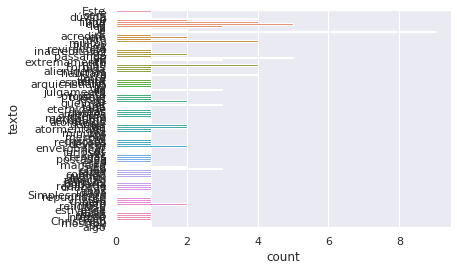

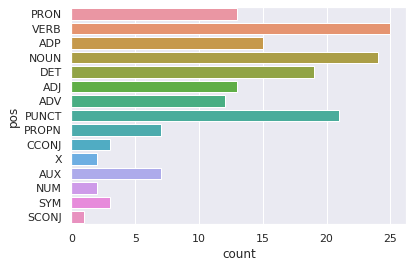

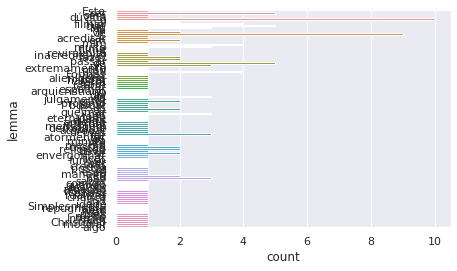

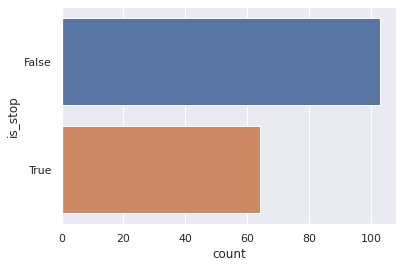

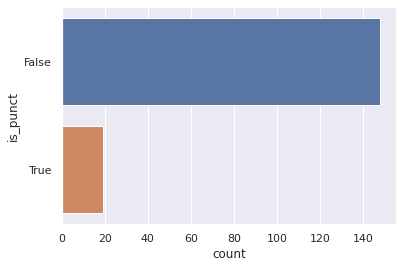

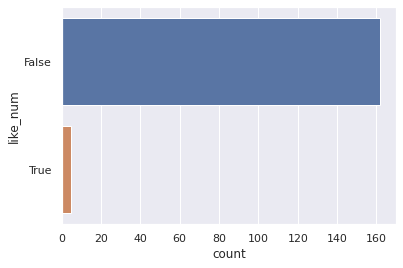

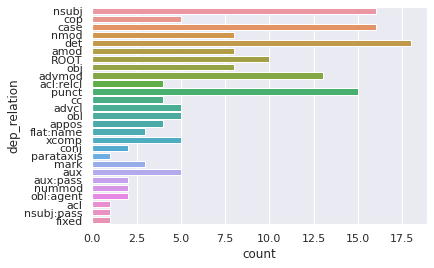

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
# ax = sns.countplot(y="pos", data=df)

for catplot in df.columns:
  sns.countplot(y=catplot, data=df)
  plt.show()

## Word vectors e similaridade <a id='vectors'></a>

Os modelos do spaCy em sua versão reduzida (`sm`), não incluem word vectors completos, de modo que é possível obter uma aproximação dessas distâncias. Caso se queira utilizar algo mais preciso, é recomendado utilizar os modelos `lg` (large) ou ainda carregar outros dicionários de vetores, como o word2vec, fastText, etc. O `gensim` é uma biblioteca que auxilia o uso de tais dicionários.

In [49]:
w1 = nlp('gato')
w2 = nlp('cachorro')
w3 = nlp('presidente')

In [50]:
w1.similarity(w2)

0.759815510570475

In [51]:
w2.similarity(w3)

0.6908386286478059

Similaridade entre textos:

In [52]:
doc_review = nlp(review)
doc_wiki   = nlp(content)

doc_review.similarity(doc_wiki)

0.8251290314438949